In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Loading the **MNIST**(Modified National Institute of Standards and Technology database) data.

MNIST (Modified National Institute of Standards and Technology database) is a large database of 70,000 handwritten digits.

It has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST (National Institute of Standards and Technology).

In [ ]:
from tensorflow.keras.datasets.mnist import load_data
(X_train,Y_train),(X_test,Y_test) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

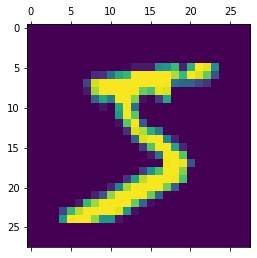

In [ ]:
plt.matshow(X_train[0])

In [ ]:
Y_train[0]

5


# **Data Preprocessing**

Let's normalize our data (i.e. both X_train and X_test). Normalization is a process that changes the range of pixel intensity values to the range 0 to 1.

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Converting to one dimensional

In [ ]:
X_train_flatened = X_train.reshape(len(X_train),28*28)
X_test_flatened = X_test.reshape(len(X_test),28*28)

In [ ]:
X_train_flatened.shape

(60000, 784)

Defining the model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
#model.add(Dense(10,input_shape=(784,),activation="sigmoid")) //this is without hidden layer(s)
model.add(Dense(100,input_shape=(784,),activation="relu"))
model.add(Dense(100,input_shape=(100,),activation="relu"))
model.add(Dense(10,activation="sigmoid"))

Compile the model

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])



**adam** is an optimization algorithm which is faster than Stochastic Gradient Descent. If you remember from the learning material of Day 4 (i.e. working of neural networks), we know that Stochastic Gradient Descent (SGD in short) is just a type of Gradient Descent algorithm.

**sparse_categorical_crossentropy** is a loss function similar to binary_crossentropy (discussed in Binary Classification Notebook), the only difference is that if the target variable is binary we use binary_crossentropy but if your target values are normal integers more then two, use sparse categorical crossentropy. Why not use categorical_crossentropy? You may ask. Well, this article will help you understand it.

The metrics used to evaluate the model is **accuracy**. Accuracy calculates how often the predictions calculated by the model are correct.



Fit the model

In [ ]:
model.fit(X_train_flatened,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2433 - accuracy: 0.9295
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1046 - accuracy: 0.9687
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0747 - accuracy: 0.9763
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0578 - accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0452 - accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0367 - accuracy: 0.9880
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0303 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0255 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0218 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

Evaluate the model

In [ ]:
model.evaluate(X_test_flatened,Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1034 - accuracy: 0.9768


[0.10343510657548904, 0.9768000245094299]

Now Predict

In [ ]:
prediction = model.predict(X_test_flatened)

In [ ]:
prediction[0]

array([6.5860630e-05, 1.4231801e-03, 4.1123924e-01, 4.5541435e-02,
       2.7215183e-03, 2.0349026e-04, 8.3934260e-08, 1.0000000e+00,
       2.1647666e-05, 5.6367248e-01], dtype=float32)

The above numbers are the probabilities values for different digits. The maximum probability will confirm what is the predicted digit for first image in X_test.

The value at the 0th index in above array of numbers is saying the probability of the digit being 0.

Generalize: The value at the nth index in above array of numbers is saying the probability of the digit being n

**np.argmax** finds a maximum element from an array and returns the index of it


In [ ]:
np.argmax(prediction[400])

2

In [ ]:
Y_test[400]

2